# CapsNets on Fashion Cifar-100 dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

## Loading dataset and normalising

In [2]:
(X_train, y_train), (X_test , y_test) = tf.keras.datasets.cifar100.load_data()
X_train = X_train / 255.0
X_train = tf.cast(X_train, dtype=tf.float32)

X_test = X_test / 255.0
X_test = tf.cast(X_test, dtype=tf.float32)

y_train = y_train.reshape((len(y_train),))
y_test = y_test.reshape((len(y_test),))

# Reducing the size of the samples for faster training
X_train = X_train[:1024]
y_train = y_train[:1024]

X_test = X_test[:512]
y_test = y_test[:512]

X_train.shape, y_train.shape

(TensorShape([1024, 32, 32, 3]), (1024,))

## Sample visualisation

In [3]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver",
    "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly",
    "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach",
    "couch", "cra", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox",
    "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard",
    "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid",
    "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum",
    "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew",
    "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table",
    "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe",
    "whale", "willow_tree", "wolf", "woman", "worm"
]

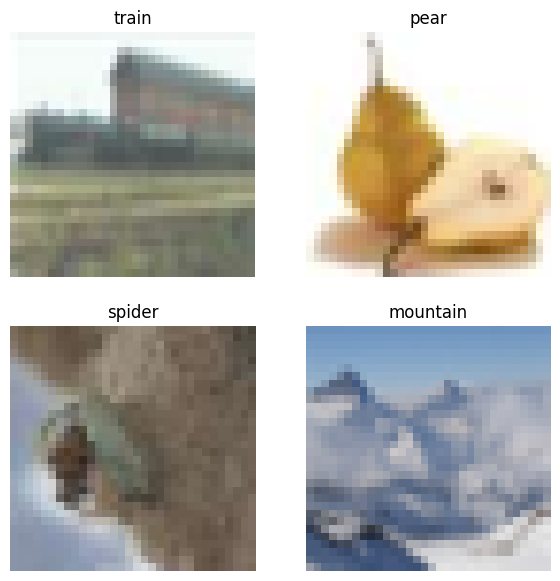

In [4]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

## Build CapsNet model

In [5]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [6]:
params = {
    "epochs": 1,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 256,
    "no_of_primary_capsules": 18,
    "primary_capsule_vector": 8,
    "no_of_secondary_capsules": 100,
    "secondary_capsule_vector": 16,
    "r":3,
}

model = CapsNet(**params)
model.compile()
model.summary()

SyntaxError: expression expected after dictionary key and ':' (2696423510.py, line 14)

In [ ]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam(), train_metrics=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
preds = model.predict(X_test)

## Loading and saving

In [ ]:
model.save(evaluate=(X_test, y_test), classes=class_names)

In [ ]:
loaded_model = tf.keras.models.load_model('../saved_models/caps_net-CIFAR-10', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()